In [12]:
import networkx as nx
import numpy as np
import sys
import shapely

In [11]:
import geopandas as gpd

In [97]:
%matplotlib inline

In [10]:
sys.path.append("/Users/haleighwright/Desktop/NCEAS/pyriv")
sys.path.append("/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages")

In [13]:
from pyriv import graph_prep as GraphBuilder
from pyriv import river_graph as RiverGraph

In [26]:
kusko_g = GraphBuilder.GraphBuilder('../../data/sasap/kusko_region_flowlines.gpickle')

do attracting components for now to get the ends of the graph

In [11]:
g_ends = nx.attracting_components(kusko_g.graph)


In [27]:
copy = kusko_g.graph.copy()


In [28]:
NODELIST = kusko_g.graph.nodes()

In [132]:
allnodesiter[5][0]

5

In [147]:
def deadends(self, allnodes):
    """
    For a directed graph, find the nodes that have in edges but no out edges.
    """
    thedict = {}
    # get a dictionary of { node: out_degree }
    degdict = self.out_degree(self.nodes())
    # convert to a 2 column array of node and out_degree
    degarr = np.array(degdict.items())
    # get a boolean index of rows where out_degree==0
    print degarr
    dead_row_ind = (degarr[:,1]==0)
    print dead_row_ind
    print degdict
    
    for i in range(0, len(degarr)):
        if dead_row_ind[i] == True:
            print i
            thedict[allnodes[i][0]] = tuple(degarr[:,0][i])
            
    # use that index to get the nodes
    #dead_nodes = degarr[:,0][dead_row_ind]
    return thedict

In [30]:
 end_dict = deadends(kusko_g.graph)

In [31]:
end_dict_snapped = deadends(kusko_g_snapped.graph)

NameError: name 'kusko_g_snapped' is not defined

In [ ]:
print(end_dict.items()[0])

In [42]:
allnodesdict = {}
thenodes = NODELIST
for i in range(0, len(thenodes)):
    allnodesdict[i] = thenodes[i]

In [ ]:
allnodesdict_snapped = {}
thenodes_snapped = NODELIST_snapped
for i in range(0, len(thenodes_snapped)):
    allnodesdict_snapped[i] = thenodes_snapped[i]

In [ ]:
allnodesdict.items()[0]

In [108]:
allnodesdict_snapped.items()[0]

(0, (-71704.67681649092, 1377383.849704166))

In [ ]:
#add_missing_edges(copy, end_dict, allnodesdict, 5.0 )

this process (the node snapping) could be broken up and done in parallel to speed it up...

### probably would be easiest to add an ID to nodes when creating the graph to not mess with lists

In [21]:
def add_missing_edges(graph, deadends, allnodes, threshold):
    missing_edges = []
    
    for key1, node1 in deadends.iteritems():
        for key2, node2 in allnodes.iteritems():
            #get the distance b/w nodes, if below threshold, add edge b/w them in graph
            if key1 != key2 and np.linalg.norm(np.subtract(node1,node2)) < threshold:
                graph.add_edge(key1,key2)
                print("added edge from "+str(key1)+" : "+str(node1)+" to "+ str(key2)+" : "+str(node2))
                
    
    

### add ID's to all the nodes

In [32]:
g_ID = kusko_g.graph.copy()

In [33]:
keys = g_ID.nodes()
d = g_ID.number_of_nodes()

In [34]:
 print type(g_ID).__name__

RiverGraph


In [35]:
attr_dict = {}
i = 0
for node in keys:
    attr_dict[node] = i
    i = i + 1

In [36]:
nx.set_node_attributes(g_ID, 'ID', attr_dict)

In [37]:
ids = nx.get_node_attributes(g_ID, 'ID')

In [38]:
for key,value in ids.iteritems():
    print key 
    print value
    break
    

(-71704.67681649092, 1377383.849704166)
0


### rewrite the missing edges function to rely on graph ID's & be more efficient

In [38]:
%%time
add_missing_edges_f(g_ID, end_dict, allnodesdict, 3.0 )

itr 13
itr 229924
itr 132061
itr 230919
itr 231567
itr 264901
itr 68846
itr 3965
itr 233816
itr 168789
itr 103757
itr 235362
added edge from 203007 : (-290938.300311207, 1301283.3149657596) to 246131 : (-290938.32268009393, 1301283.3127322474)
itr 170431
itr 269372
itr 269917
itr 172140
itr 8876
itr 75015
itr 239518
itr 207289
itr 76798
itr 56817
itr 110665
itr 171443
itr 144416
itr 177755
itr 238354
itr 244593
itr 139170
added edge from 144703 : (-421500.2361574562, 1149075.1478681166) to 165126 : (-421498.1604211468, 1149077.092522459)
itr 16560
itr 49918
itr 270573
added edge from 50869 : (-525261.9544729243, 1157991.6321857257) to 162910 : (-525264.6820633454, 1157991.8895438928)
added edge from 214903 : (-479747.76665325527, 1197392.2160671172) to 270210 : (-479749.8061004414, 1197391.509488749)
itr 83935
itr 51796
itr 248993
itr 184046
itr 184715
itr 87003
itr 22003
itr 251998
itr 252579
itr 56702
itr 221068
itr 254420
itr 255146
itr 26366
itr 27043
itr 93267
itr 192175
itr 43045

In [109]:
%%time
add_missing_edges_f(g_ID_snapped, end_dict_snapped, allnodesdict_snapped, 3.0 )

itr 65540
itr 33314
itr 33789
itr 99914
itr 231586
itr 2774
itr 36120
itr 69519
itr 70031
itr 234396
itr 5568
itr 6112
itr 170470
itr 40040
itr 237170
itr 66917
itr 238228
itr 271568
itr 206676
itr 198377
itr 43924
itr 208303
itr 176099
itr 143811
itr 111576
added edge from 144666 : (-421500.2361574562, 1149075.1478681166) to 166612 : (-421498.1604211468, 1149077.092522459)
itr 210551
itr 243974
itr 47922
itr 81306
itr 245851
itr 199453
itr 17745
added edge from 50857 : (-525261.9544729243, 1157991.6321857257) to 164345 : (-525264.6820633454, 1157991.8895438928)
added edge from 214842 : (-479747.76665325527, 1197392.2160671172) to 270457 : (-479749.8061004414, 1197391.509488749)
itr 83858
itr 84524
itr 183339
itr 20128
itr 250147
itr 250784
itr 120218
itr 219167
itr 23191
itr 89485
itr 90019
itr 25084
itr 91296
itr 255766
itr 256412
itr 191536
itr 126583
itr 94373
itr 256129
itr 30046
itr 30660
itr 31302
itr 64688
itr 130846
CPU times: user 59min 3s, sys: 3min 51s, total: 1h 2min 55s
W

In [39]:
problem_points = {}

In [40]:
def add_missing_edges_f(graph, deadends, allnodes, threshold):
    cnt = 0
    for key1, node1 in deadends.iteritems():
        if cnt%100==0:
            print("itr "+str(key1))
        cnt = cnt + 1
        for key2, node2 in allnodes.iteritems():
            #print node1
            xd = node1[0] - node2[0]
            yd = node1[1] - node2[1]
            dist = np.sqrt((xd*xd + yd*yd))
            
            if key1 != key2 and dist < threshold and dist > 0:
                graph.add_edge(key1, key2)
                print("added edge from "+str(key1)+" : "+str(node1)+" to "+ str(key2)+" : "+str(node2))
                problem_points[str(cnt)+"_A"] =key1
                problem_points[str(cnt)+"_B"] =key2
                break
                
            
    

## write problem nodes to a shape file so we can see them on the map

In [21]:
from shapely.geometry import Point

In [14]:
problem_points = { "1_A": (-421500.2361574562, 1149075.1478681166),
                 "1_B": (-421498.1604211468, 1149077.092522459),
                  "2_A": (-525261.9544729243, 1157991.6321857257),
                 "2_B": (-525264.6820633454, 1157991.8895438928),
                 "3_A":(-479747.76665325527, 1197392.2160671172),
                 "3_B":(-479749.8061004414, 1197391.509488749)
                 }


In [24]:
write_problem_points(problem_points, '../../data/sasap/kusko_region_flowlines_PP.shp', 'epsg:3338')

In [23]:
def write_problem_points(pts, filepath, projection_code):
    pts = list(pts.values())
    kcdf = gpd.GeoDataFrame({'geometry': [Point(n) for n in pts]})
    kcdf.crs = {'init': projection_code}
    kcdf.to_file(filepath)
        

## cpu bound --> need multiprocessing for parallel

In [51]:
from multiprocessing import Pool
# to do multiprocessing need to replace outer loop with 

In [44]:

parallel_graph = copy.copy()



In [75]:
allnodesiter = allnodesdict.items()
print(type(allnodesiter))

<type 'list'>


In [78]:
print(allnodesiter[0][1])

(-71704.67681649092, 1377383.849704166)


#### get list of keys because map maps a function over a sequence
a sequence is of types: str, unicode, list, tuple, buffer, xrange

In [63]:
parallel_keys = end_dict.keys()

In [64]:
print(type(parallel_keys))
print(type(parallel_keys[0]))
print(parallel_keys[0])

<type 'list'>
<type 'int'>
13


In [86]:
%%time
l = [1,2,3]
pl = Pool(8)
threshold=3.0
pl.map(add_missing_edges_p, parallel_keys)
pl.map(dummy, [1,2,3])
pl.close()
pl.join()

added edge from 135440 : (-281722.4101454012, 1205422.1248466056) to 30379 : (-281719.6003416084, 1205423.0566918675)
added edge from 67999 : (-384633.71639956214, 1101832.6761768956) to 31675 : (-384635.60995205474, 1101831.1190393448)
added edge from 130195 : (-469025.6336910167, 1245073.1393598316) to 268628 : (-469023.956192903, 1245074.6706769322)
added edge from 64707 : (-404466.58427937684, 1113788.7204836898) to 19965 : (-404467.5643552014, 1113786.0379454484)
added edge from 159916 : (-415149.1802666219, 1209363.3510993754) to 11678 : (-415147.1179294732, 1209363.825992552)
added edge from 193001 : (-597301.8262366866, 1230931.7572156377) to 271770 : (-597303.2911155764, 1230930.0743172225)
42
41
43
CPU times: user 7.03 s, sys: 3.84 s, total: 10.9 s
Wall time: 13min 5s


In [193]:
# create a test situaton to assure parallel version is working right
test = nx.DiGraph()
test.add_nodes_from([(1,2),(3,4),(5,6),(1.2,2.2),(3.2,4.2),(5.2,6.2)])
test.add_edges_from([((1,2),(3,4)),((3,4),(5,6)),((5,6),(5.2,6.2)),((1.2,2.2),(3.2,4.2))])

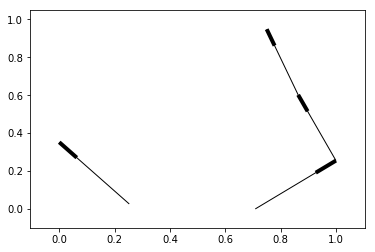

In [194]:
nx.draw_networkx_edges(test,pos=nx.spring_layout(test))

In [195]:
allnodes=test.nodes()
allnodesiter = {}
for i in range(0, len(allnodes)):
    allnodesiter[i]=(i,allnodes[i])
    
test_ends = deadends(test,allnodesiter)
print allnodesiter

[[(1, 2) 1]
 [(3.2, 4.2) 0]
 [(5.2, 6.2) 0]
 [(5, 6) 1]
 [(1.2, 2.2) 1]
 [(3, 4) 1]]
[False  True  True False False False]
{(1, 2): 1, (3.2, 4.2): 0, (5.2, 6.2): 0, (5, 6): 1, (1.2, 2.2): 1, (3, 4): 1}
1
2
{0: (0, (1, 2)), 1: (1, (3.2, 4.2)), 2: (2, (5.2, 6.2)), 3: (3, (5, 6)), 4: (4, (1.2, 2.2)), 5: (5, (3, 4))}


In [196]:
print test.number_of_edges()
pkeys=test_ends.keys()
print pkeys


4
[1, 2]


In [197]:
%%time
l = [1,2,3]
pl = Pool(8)
threshold=3.0
pl.map(add_missing_edges_p, pkeys)
pl.map(dummy, [1,2,3])
pl.close()
pl.join()

4
4
5
5
added edge from 2 : (5.2, 6.2) to 1 : (3.2, 4.2)
added edge from 1 : (3.2, 4.2) to 2 : (5.2, 6.2)
42
43
41
CPU times: user 25.5 ms, sys: 86.3 ms, total: 112 ms
Wall time: 210 ms


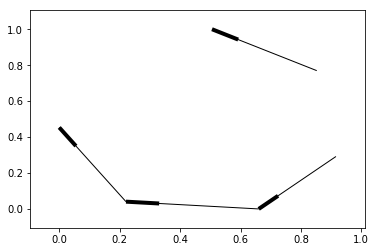

In [198]:
nx.draw_networkx_edges(test,pos=nx.spring_layout(test))

In [199]:
test.number_of_edges()

4

In [192]:
def add_missing_edges_p(key1):
    node1 = allnodesiter[key1][1]
    for i in range(0,len(allnodesiter)):
        node2=allnodesiter[i][1]
        key2=allnodesiter[i][0]
        xd = node1[0] - node2[0]
        yd = node1[1] - node2[1]
        dist = np.sqrt((xd*xd + yd*yd))
        if key1 != key2 and dist < threshold and dist > 0:
            print test.number_of_edges()
            test.add_edge(key1, key2)
            print test.number_of_edges()
            print("added edge from "+str(key1)+" : "+str(node1)+" to "+ str(key2)+" : "+str(node2))
            break
    

In [70]:
def dummy(kt):
    kt = kt+40
    print(kt)

In [57]:

cnt = 0
allnodes = allnodesdict
graph = g_ID
threshold = 5.0
    
for key1, node1 in deadends.iteritems():
    if cnt%100==0:
        print("itr "+str(key1))
    cnt = cnt + 1
    for key2, node2 in allnodes.iteritems():
        #print node1
        xd = node1[0] - node2[0]
        yd = node1[1] - node2[1]
        dist = np.sqrt((xd*xd + yd*yd))
            
        if key1 != key2 and dist < threshold and dist > 0:
            graph.add_edge(key1, key2)
            print("added edge from "+str(key1)+" : "+str(node1)+" to "+ str(key2)+" : "+str(node2))
            break

### get some stats on the snapped network

In [88]:
kusko_g_snapped = GraphBuilder.GraphBuilder('../../data/sasap/kusko_region_flowlines_snap.shp')

In [89]:
g_ID_snapped = kusko_g_snapped.graph.copy()
print type(g_ID_snapped).__name__    

RiverGraph


In [90]:
keys = g_ID_snapped.nodes()
d = g_ID_snapped.number_of_nodes()
attr_dict = {}
i = 0
for node in keys:
    attr_dict[node] = i
    i = i + 1
nx.set_node_attributes(g_ID_snapped, 'ID', attr_dict)
ids = nx.get_node_attributes(g_ID_snapped, 'ID')
for key,value in ids.iteritems():
    print key 
    print value
    break

(-71704.67681649092, 1377383.849704166)
0


In [110]:
print nx.number_weakly_connected_components(g_ID)
print nx.number_weakly_connected_components(g_ID_snapped)

5552
5551


In [111]:
print nx.number_weakly_connected_components(kusko_g.graph)
print  nx.number_weakly_connected_components(kusko_g_snapped.graph)

5548
5548


In [112]:
print nx.is_weakly_connected(g_ID)
print nx.is_weakly_connected(g_ID_snapped)

False
False


In [113]:
print nx.is_weakly_connected(kusko_g.graph)
print nx.is_weakly_connected(kusko_g_snapped.graph)

False
False


In [114]:
print nx.is_semiconnected(g_ID)
print nx.is_semiconnected(g_ID_snapped)

False
False


In [115]:
print nx.is_semiconnected(kusko_g.graph)
print nx.is_semiconnected(kusko_g_snapped.graph)

False
False


In [116]:
print g_ID.number_of_edges()
print g_ID_snapped.number_of_edges()

284701
284690


In [99]:
print kusko_g.graph.number_of_edges()
print kusko_g_snapped.graph.number_of_edges()

284697
284687


In [117]:
tmp_g = g_ID.to_undirected()
tmp_g_s = g_ID_snapped.to_undirected()

In [118]:
tmp_k = kusko_g.graph.to_undirected()
tmp_k_s = kusko_g.graph.to_undirected()


In [119]:
print nx.is_connected(tmp_g)
print nx.is_connected(tmp_k)
print nx.is_connected(tmp_g_s)
print nx.is_connected(tmp_k_s)

False
False
False
False


In [104]:
NODELIST_snapped = kusko_g_snapped.graph.nodes()

## some visualizations with geopandas

In [80]:
orig = gpd.read_file('../../data/sasap/kusko_region_flowlines.shp')